In [1]:
!pip install spotipy

You should consider upgrading via the 'c:\users\zeyne\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

In [3]:
!pip install pyyaml

You should consider upgrading via the 'c:\users\zeyne\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [55]:
!pip install matplotlib

You should consider upgrading via the 'c:\users\zeyne\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [58]:
!pip install seaborn

You should consider upgrading via the 'c:\users\zeyne\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [59]:
import pandas as pd 
import numpy as np
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [5]:
with open("spotify_info.yml", 'r') as stream:
    spotify_details = yaml.safe_load(stream)

In [6]:
client = spotify_details['client_id']
secret = spotify_details['client_secret']
uri = spotify_details['redirect_uri']
username = spotify_details['username']
scope = 'user-library-read playlist-modify-public playlist-read-private'

In [7]:
client_credentials_manager = SpotifyClientCredentials(client_id=client, client_secret=secret) 

In [8]:
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [9]:
token = util.prompt_for_user_token(username=username, scope=scope, client_id=client,
                                  client_secret=secret, redirect_uri=uri)

In [10]:
sp = spotipy.Spotify(auth=token)

In [20]:
playlist_id = '55CskzUE69YH7t1DPF2oro'
playlist = sp.user_playlist(username, playlist_id)

In [27]:
def get_all_songs(sp, username, playlist_id=None):
    response = sp.user_playlist_tracks(username, playlist_id)
    results = response["items"]
    # subsequently runs until it hits the user-defined limit or has read all songs in the library
    while len(results) < response["total"]:
        response = sp.user_playlist_tracks(username, playlist_id, offset=len(results))
        results.extend(response["items"])
    return results

In [32]:
playlist = get_all_songs(sp, username, playlist_id)
print(len(playlist))

477


In [35]:
track_ids = []
track_names = []

for i in range(len(playlist)):
    if playlist[i]['track']['id'] != None: # Removes the local tracks in your playlist if there is any
        track_ids.append(playlist[i]['track']['id'])
        track_names.append(playlist[i]['track']['name'])

features = []
for i in range(len(track_ids)):
    audio_features = sp.audio_features(track_ids[i])
    for track in audio_features:
        features.append(track)
        
playlist_df = pd.DataFrame(features, index = track_names)

In [37]:
playlist_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
Problem,0.653,0.802,1,-5.317,0,0.2150,0.0214,0.000019,0.1080,0.589,102.993,audio_features,0NenBmcPtlaBGYAhU798G4,spotify:track:0NenBmcPtlaBGYAhU798G4,https://api.spotify.com/v1/tracks/0NenBmcPtlaB...,https://api.spotify.com/v1/audio-analysis/0Nen...,193987,4
Rather Be (feat. Jess Glynne),0.799,0.586,11,-6.735,1,0.0377,0.1620,0.000002,0.1930,0.549,120.970,audio_features,3s4U7OHV7gnj42VV72eSZ6,spotify:track:3s4U7OHV7gnj42VV72eSZ6,https://api.spotify.com/v1/tracks/3s4U7OHV7gnj...,https://api.spotify.com/v1/audio-analysis/3s4U...,227833,4
Summer,0.603,0.861,4,-3.565,0,0.0325,0.0215,0.043000,0.1000,0.720,127.962,audio_features,7b71WsDLb8gG0cSyDTFAEW,spotify:track:7b71WsDLb8gG0cSyDTFAEW,https://api.spotify.com/v1/tracks/7b71WsDLb8gG...,https://api.spotify.com/v1/audio-analysis/7b71...,224507,4
"Happy - From ""Despicable Me 2""",0.647,0.822,5,-4.662,0,0.1830,0.2190,0.000000,0.0908,0.962,160.019,audio_features,5b88tNINg4Q4nrRbrCXUmg,spotify:track:5b88tNINg4Q4nrRbrCXUmg,https://api.spotify.com/v1/tracks/5b88tNINg4Q4...,https://api.spotify.com/v1/audio-analysis/5b88...,232720,4
Fancy,0.914,0.716,10,-4.136,0,0.0646,0.0871,0.000000,0.0489,0.375,94.979,audio_features,0m7dJ7cibvW774OP5GbWHB,spotify:track:0m7dJ7cibvW774OP5GbWHB,https://api.spotify.com/v1/tracks/0m7dJ7cibvW7...,https://api.spotify.com/v1/audio-analysis/0m7d...,199938,4


In [38]:
cols = ['id', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [39]:
playlist_df = playlist_df[cols]
playlist_df.sample(5)

,id,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
Princess of China - Acoustic,2tKqZsc0epdLrsNUT6y0Ls,206693,0.245,0.471,9,-7.952,0.0313,0.6520,0.007170,0.1260,0.287,165.996
Partition,2BruZeV86mhihFs4wVuKSt,318967,0.000,0.000,0,-60.000,0.0000,0.0000,0.000000,0.0000,0.000,0.000
Mockingbird,17baAghWcrewNOcc9dCewx,251267,0.621,0.672,4,-3.892,0.2760,0.2100,0.000000,0.1300,0.228,83.808
Imagination,0CgTuGTVzwPDd8o2rWH6DE,217773,0.481,0.455,0,-5.942,0.0286,0.0743,0.000000,0.0694,0.333,179.468
Goodbye To Yesterday,0RSkLhxAc601EgeKkyXNVB,179130,0.626,0.835,7,-5.059,0.0451,0.3770,0.000001,0.3900,0.699,138.031


In [40]:
print("Shape of the dataset: ",playlist_df.shape)

Shape of the dataset:  (476, 12)


In [42]:
dct = {}
for i in list(playlist_df.columns):
    dct[i]=playlist_df[i].value_counts().shape[0]
pd.DataFrame(dct,index=['unique count']).T

,unique count
id,475
duration_ms,458
danceability,322
energy,346
key,12
loudness,454
speechiness,328
acousticness,423
instrumentalness,231
liveness,285


In [43]:
playlist_df.describe()

,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,228205.403361,0.577721,0.650220,5.390756,-6.635742,0.072905,0.206223,0.011464,0.165083,0.425521,119.897141
std,45491.200411,0.150313,0.200808,3.474817,5.469113,0.065028,0.254416,0.073041,0.120789,0.218331,29.724935
min,56061.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,203107.000000,0.483750,0.527500,2.000000,-7.182250,0.035875,0.014150,0.000000,0.094875,0.260750,99.078250
50%,223900.000000,0.592000,0.679500,6.000000,-5.873000,0.046900,0.074300,0.000001,0.118000,0.394500,121.644500
75%,248863.000000,0.681250,0.802250,8.000000,-4.629500,0.083975,0.324500,0.000176,0.192250,0.564250,135.984250
max,526387.000000,0.948000,0.996000,11.000000,-0.443000,0.507000,0.959000,0.844000,0.831000,0.978000,204.045000


In [45]:
pd.DataFrame(playlist_df.isnull().sum(),columns=['null count'])

,null count
id,0
duration_ms,0
danceability,0
energy,0
key,0
loudness,0
speechiness,0
acousticness,0
instrumentalness,0
liveness,0


In [50]:
np.random.seed(42)

playlist_df['label'] = np.random.randint(0, 2, playlist_df.shape[0])

In [53]:
playlist_df.sample(10)

,id,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,label
Needed Me,3kfxarilcBr81mb2hmZLeh,191600,0.671,0.314,5,-8.091,0.2440,0.11000,0.000000,0.0825,0.2960,110.898,1
We Won't,5pLjOLnVVOVK6uvHmhBz8f,243500,0.501,0.315,6,-11.146,0.1350,0.43500,0.000000,0.3680,0.5200,61.161,0
Before I Sleep,3OPkdqjncpdEgngOiSFHfn,214147,0.548,0.479,2,-9.088,0.0524,0.06900,0.000969,0.0963,0.0670,126.005,0
Whataya Want from Me - Live at ENERGY Berlin 103.4,1xcxzCeF86LD3mFh36Ou4S,235800,0.480,0.325,7,-7.700,0.0286,0.29800,0.000000,0.1100,0.2440,84.962,0
Castle In The Snow,2e1WR9PYEAyuu9k5hNHHI1,212893,0.664,0.807,4,-4.855,0.0463,0.01730,0.000030,0.0893,0.6410,98.017,1
Cold Water (feat. Justin Bieber & MØ),6DNtNfH8hXkqOX1sjqmI7p,185352,0.608,0.798,6,-5.092,0.0432,0.07360,0.000000,0.1560,0.5010,92.943,1
Trust Issues,2hZuBpxfT40wqkammRWp1C,217933,0.703,0.696,9,-6.950,0.0295,0.41900,0.000216,0.2820,0.7730,133.971,1
Drunk in Love,7hEGsxEkKG1BOhClhLcWvj,322963,0.000,0.000,0,-60.000,0.0000,0.00000,0.000000,0.0000,0.0000,0.000,0
Why'd You Bring a Shotgun to the Party,623X3u4i9Ff2TItd0jUp9H,200239,0.740,0.776,2,-3.299,0.1290,0.00593,0.000029,0.0712,0.7170,130.074,1
Stay High - Habits Remix,5JCi3pyggvk4B0yd0BK3ow,258387,0.736,0.677,4,-7.036,0.0352,0.00114,0.844000,0.0949,0.0747,121.010,0


In [64]:
playlist_df.index.is_unique

False

In [67]:
playlist_df = playlist_df.loc[~playlist_df.index.duplicated(), :]
playlist_df.sample(5)

,id,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,label
Sirens Call,39mFHYM8K21BtSp2GfQjUG,223947,0.510,0.671,2,-6.723,0.0266,0.5100,0.000002,0.1220,0.2620,135.984,1
#SELFIE,0zkiQH567SDLqfWNBaU3hv,183750,0.808,0.915,0,-3.277,0.2330,0.0136,0.000009,0.0788,0.6470,127.984,0
No Grey,2NNzvsOFpztTUUzk6rcnPH,206960,0.830,0.828,9,-5.562,0.0494,0.0509,0.008240,0.3310,0.6650,89.905,0
Walking On A Dream,72MXQsTad1er96t2mgVM01,235897,0.593,0.272,7,-11.615,0.0322,0.8810,0.000000,0.1130,0.2350,117.221,0
Shades Of Cool,7tRz2qqm4l0eZBq0Kq5TJY,342093,0.259,0.471,2,-6.929,0.0303,0.5650,0.019400,0.2420,0.0899,138.025,0


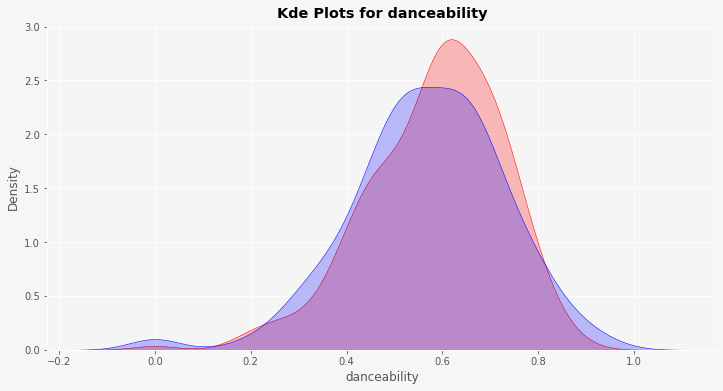

In [87]:
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')
sns.kdeplot(playlist_df.loc[(playlist_df['label']==1),'danceability'], color='r',
            shade=True, Label='liked')
  
sns.kdeplot(playlist_df.loc[(playlist_df['label']==0),'danceability'], color='b',
            shade=True, Label='disliked')
for i in ["top","right"]:
    ax.spines[i].set_visible(False)
plt.title('Kde Plots for danceability',weight='bold')

plt.show()

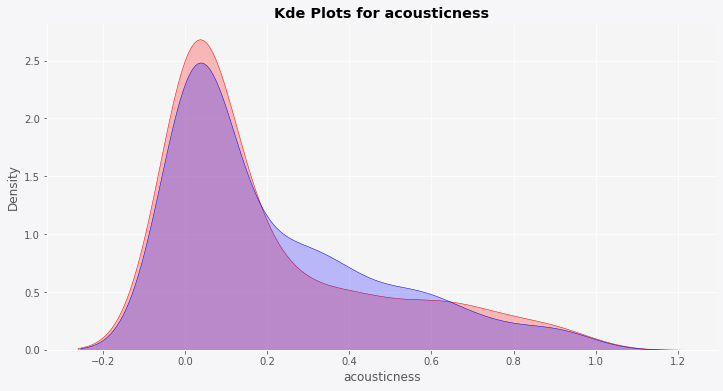

In [88]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')
sns.kdeplot(playlist_df.loc[(playlist_df['label']==1),'acousticness'], color='r',
            shade=True, Label='liked')
  
sns.kdeplot(playlist_df.loc[(playlist_df['label']==0),'acousticness'], color='b',
            shade=True, Label='disiked')
for i in ["top","right"]:
    ax.spines[i].set_visible(False)
plt.title('Kde Plots for acousticness',weight='bold')
plt.show()

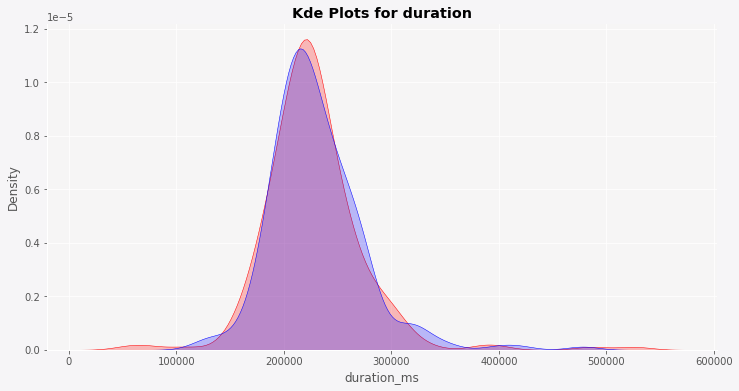

In [75]:
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')
sns.kdeplot(playlist_df.loc[(playlist_df['label']==1),'duration_ms'], color='r',
            shade=True, Label='liked')
  
sns.kdeplot(playlist_df.loc[(playlist_df['label']==0),'duration_ms'], color='b',
            shade=True, Label='disliked')
for i in ["top","right"]:
    ax.spines[i].set_visible(False)
plt.title('Kde Plots for duration',weight='bold')
plt.show()

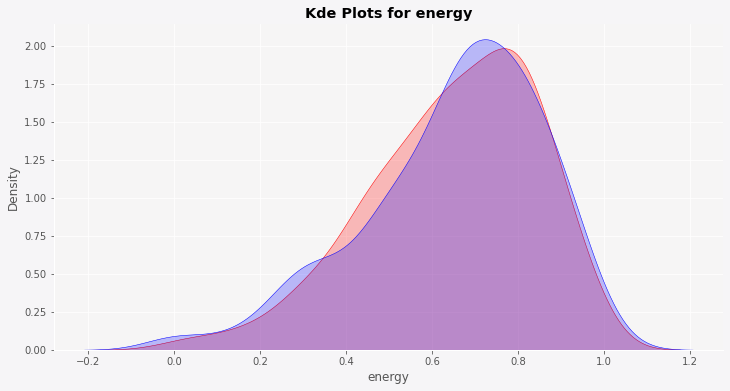

In [76]:
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')
sns.kdeplot(playlist_df.loc[(playlist_df['label']==1),'energy'], color='r',
            shade=True, Label='liked')
  
sns.kdeplot(playlist_df.loc[(playlist_df['label']==0),'energy'], color='b',
            shade=True, Label='disliked')
for i in ["top","right"]:
    ax.spines[i].set_visible(False)
plt.title('Kde Plots for energy',weight='bold')
plt.show()

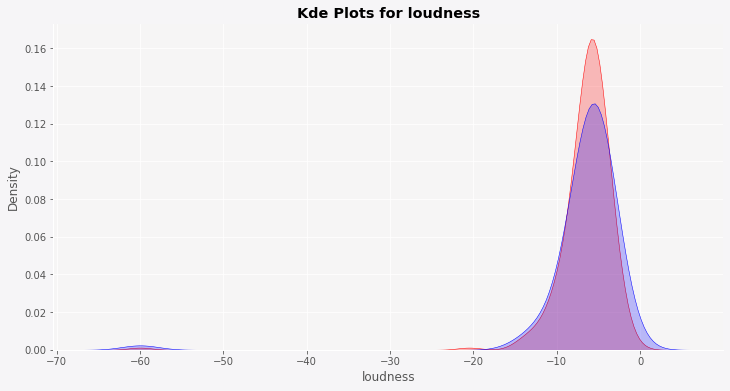

In [77]:
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')
sns.kdeplot(playlist_df.loc[(playlist_df['label']==1),'loudness'], color='r',
            shade=True, Label='liked')
  
sns.kdeplot(playlist_df.loc[(playlist_df['label']==0),'loudness'], color='b',
            shade=True, Label='disliked')
for i in ["top","right"]:
    ax.spines[i].set_visible(False)
plt.title('Kde Plots for loudness',weight='bold')
plt.show()

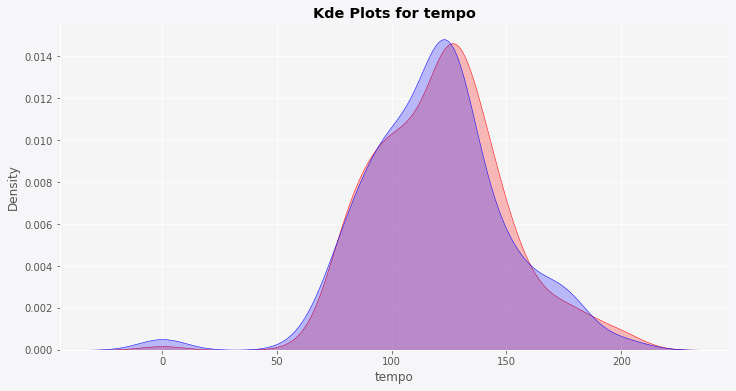

In [78]:
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')
sns.kdeplot(playlist_df.loc[(playlist_df['label']==1),'tempo'], color='r',
            shade=True, Label='liked')
  
sns.kdeplot(playlist_df.loc[(playlist_df['label']==0),'tempo'], color='b',
            shade=True, Label='disliked')
for i in ["top","right"]:
    ax.spines[i].set_visible(False)
plt.title('Kde Plots for tempo',weight='bold')
plt.show()

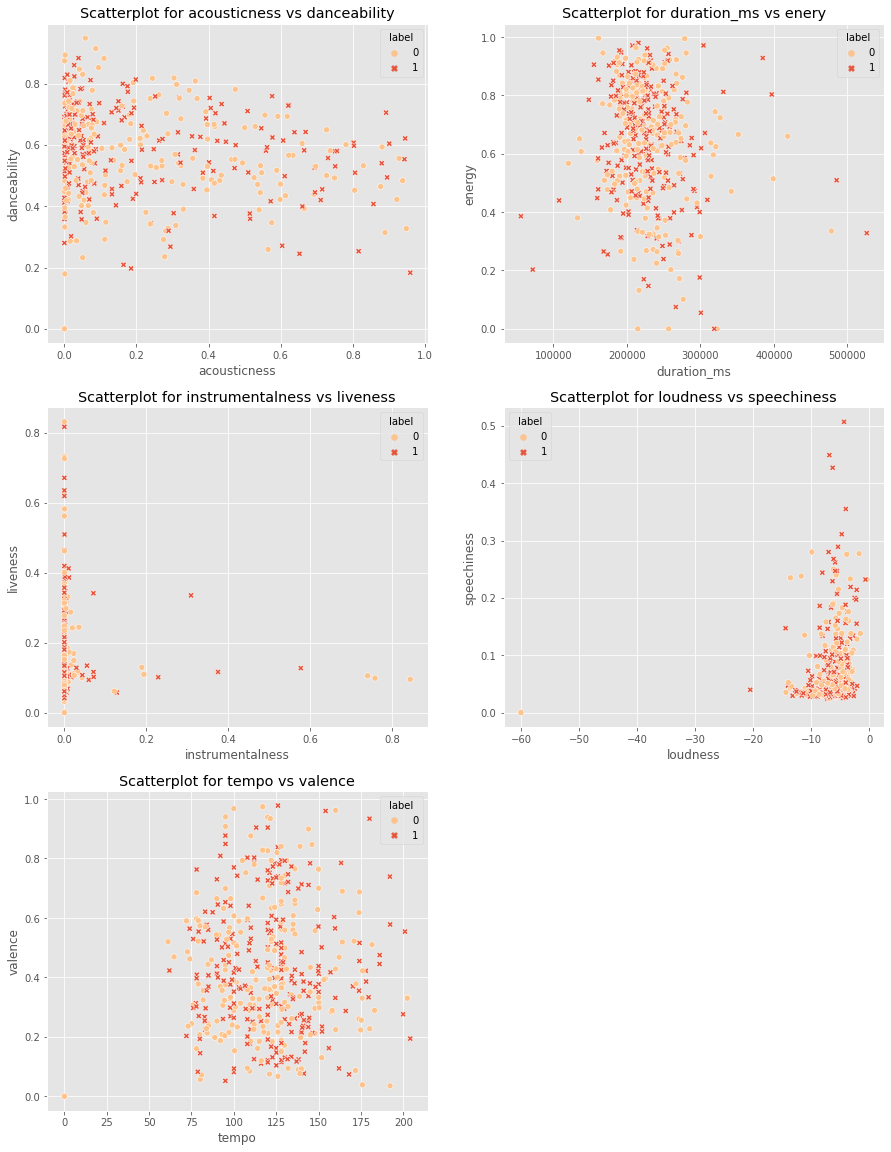

In [80]:
plt.figure(figsize=(15,20))
plt.subplot(3,2,1)
sns.scatterplot(data=playlist_df,x=playlist_df['acousticness'],y=playlist_df['danceability'],hue=playlist_df['label'],palette="OrRd",style=playlist_df['label'])
plt.title('Scatterplot for acousticness vs danceability')
plt.subplot(3,2,2)
sns.scatterplot(data=playlist_df,x=playlist_df['duration_ms'],y=playlist_df['energy'],hue=playlist_df['label'],palette="OrRd",style=playlist_df['label'])
plt.title('Scatterplot for duration_ms vs enery')
plt.subplot(3,2,3)
sns.scatterplot(data=playlist_df,x=playlist_df['instrumentalness'],y=playlist_df['liveness'],hue=playlist_df['label'],palette="OrRd",style=playlist_df['label'])
plt.title('Scatterplot for instrumentalness vs liveness')
plt.subplot(3,2,4)
sns.scatterplot(data=playlist_df,x=playlist_df['loudness'],y=playlist_df['speechiness'],hue=playlist_df['label'],palette="OrRd",style=playlist_df['label'])
plt.title('Scatterplot for loudness vs speechiness')
plt.subplot(3,2,5)
sns.scatterplot(data=playlist_df,x=playlist_df['tempo'],y=playlist_df['valence'],hue=playlist_df['label'],palette="OrRd",style=playlist_df['label'])
plt.title('Scatterplot for tempo vs valence')
plt.show()

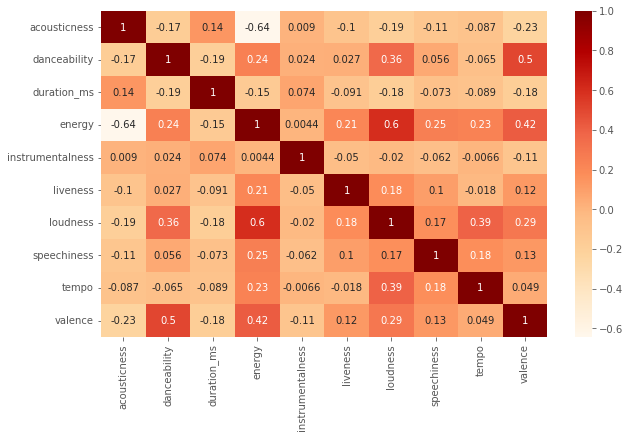

In [81]:
data_numerical=playlist_df[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']]
plt.figure(figsize=(10,6))

sns.heatmap(data_numerical.corr(),annot=True,cmap='OrRd')
plt.show()

<Figure size 2000x1500 with 0 Axes>

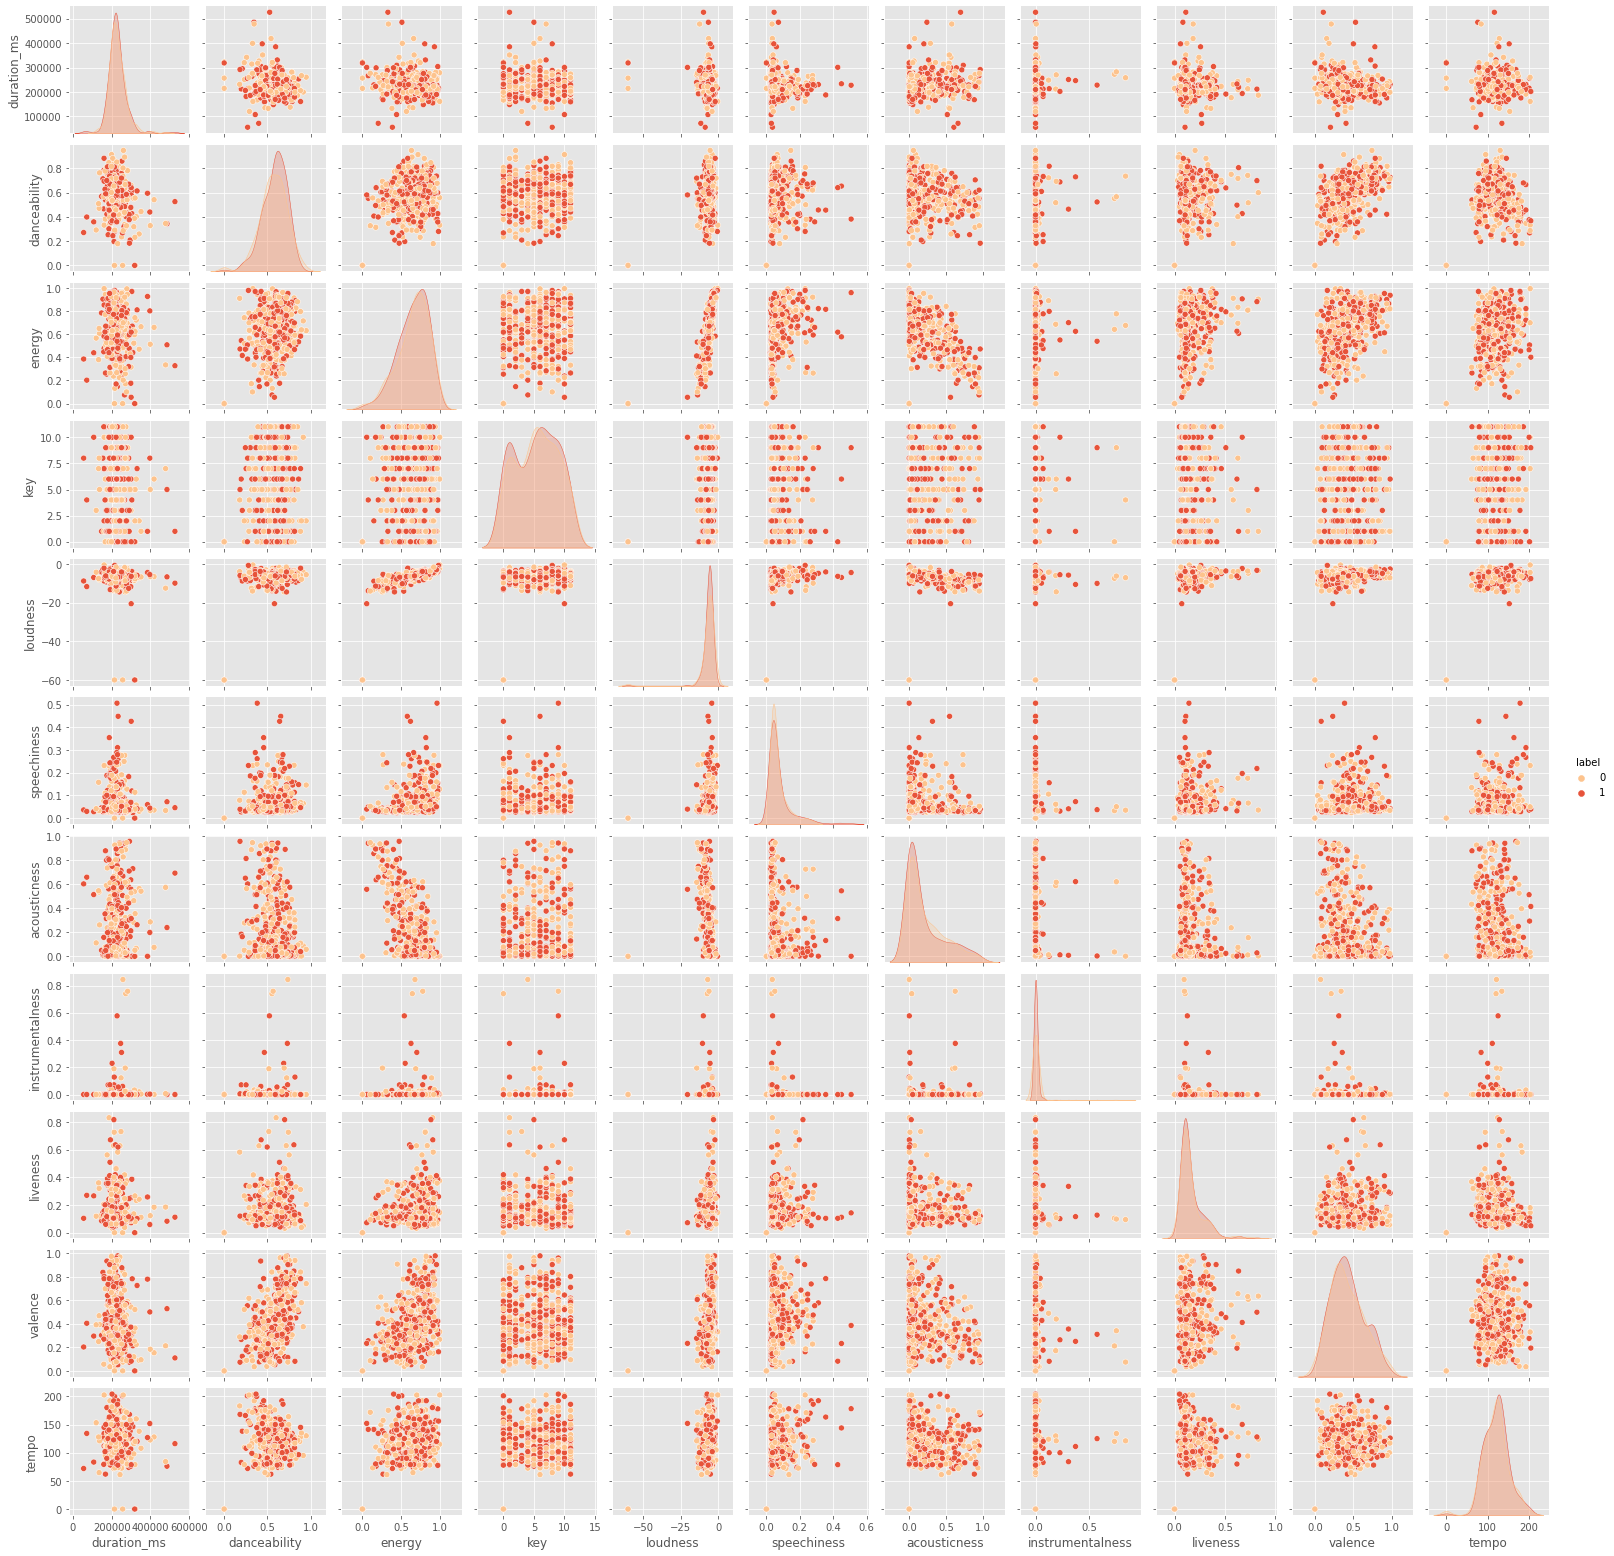

In [82]:
fig=plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(data=playlist_df,hue='label',size=2,palette='OrRd')
plt.show()

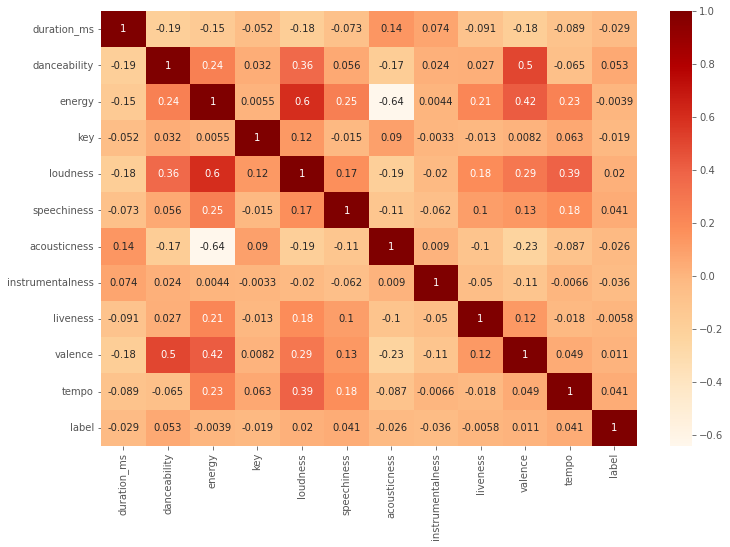

In [83]:
plt.figure(figsize=(12,8))
sns.heatmap(playlist_df.corr(),annot=True,cmap='OrRd')
plt.show()

In [94]:
X = playlist_df.drop(columns=['label','id'],axis=1)
y = playlist_df['label']

In [90]:
!pip install sklearn

Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


You should consider upgrading via the 'c:\users\zeyne\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix

In [96]:
clf_log = LogisticRegression()
clf_log.fit(X_train,y_train)

preds = clf_log.predict(X_test)
acc_log = accuracy_score(y_test,preds)

print("Test accuracy is ", acc_log)

Test accuracy is  0.44565217391304346


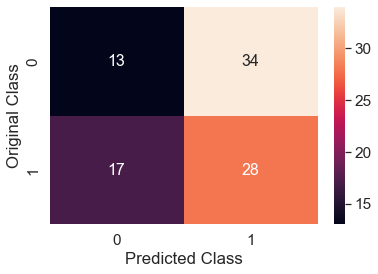

In [97]:
plt.figure(figsize=(6,4))
df = pd.DataFrame(confusion_matrix(y_test, preds), range(2),range(2))
sns.set(font_scale=1.4) #for label size
sns.heatmap(df, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

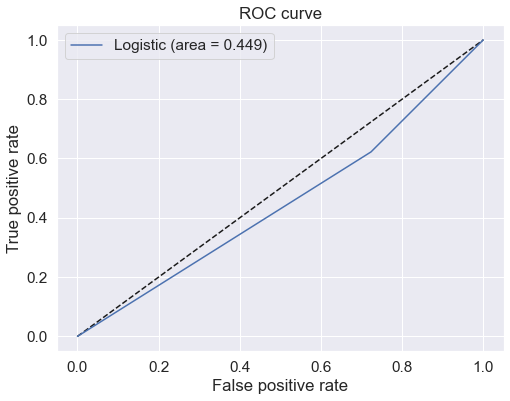

In [98]:
y_pred = preds.ravel()

from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Logistic (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [99]:
clf_dc = DecisionTreeClassifier()
clf_dc.fit(X_train,y_train)

preds_2 = clf_dc.predict(X_test)
acc_dc = accuracy_score(y_test,preds_2)

print("Test accuracy is ", acc_dc)

Test accuracy is  0.4673913043478261


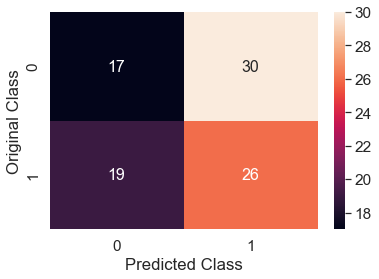

In [101]:
plt.figure(figsize=(6,4))
df = pd.DataFrame(confusion_matrix(y_test, preds_2), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [102]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train,y_train)

preds_3 = clf_rf.predict(X_test)
acc_rf = accuracy_score(y_test,preds_3)

print("Test accuracy is ", acc_rf)

Test accuracy is  0.4673913043478261


In [104]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train,y_train)

preds_4 = clf_knn.predict(X_test)
acc_knn = accuracy_score(y_test,preds_4)

print("Test accuracy is ", acc_knn)

Test accuracy is  0.5760869565217391


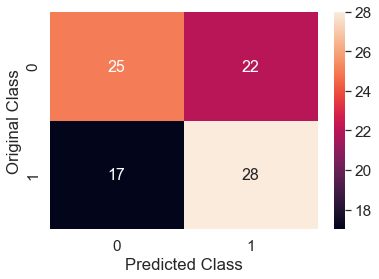

In [105]:
plt.figure(figsize=(6,4))
df = pd.DataFrame(confusion_matrix(y_test, preds_4), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [106]:
clf_svc = SVC()
clf_svc.fit(X_train,y_train)

preds_5 = clf_svc.predict(X_test)
acc_svc = accuracy_score(y_test,preds_5)

print("Test accuracy is ", acc_svc)

Test accuracy is  0.45652173913043476


In [107]:
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)

preds_6 = clf_gnb.predict(X_test)
acc_gnb = accuracy_score(y_test,preds_6)

print("Test accuracy is ", acc_gnb)

Test accuracy is  0.4673913043478261
